In [99]:
import numpy as np
from sklearn.neighbors import KernelDensity
import scipy
from scipy.stats import gaussian_kde
import pandas as pd
from tqdm import tqdm
from config_management.data_config_muon_decay import DataConfig
import gen_data
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
from matplotlib import cm  # For colormap

In [93]:
file_path = './data/MuonDecay.csv'
df = pd.read_csv(file_path)
print(df.head())
columns = ['m12^2', 'm23^2']
samples = df[columns].to_numpy()

     # px_e      py_e      pz_e       e_e  px_vebar  py_vebar  pz_vebar  \
0 -0.007908  0.020322  0.037241  0.043158  0.007663 -0.008776  0.009075   
1 -0.006682  0.037049  0.021034  0.043128  0.011770 -0.019561  0.011261   
2  0.018543 -0.018376  0.017991  0.031709 -0.035163  0.033106 -0.005874   
3  0.034536 -0.034656 -0.014669  0.051080 -0.014345  0.015263 -0.003456   
4 -0.024363 -0.032509 -0.026707  0.048620 -0.005359 -0.000340  0.006264   

    e_vebar     px_vm     py_vm     pz_vm      e_vm     m12^2     m13^2  \
0  0.014768  0.000245 -0.011546 -0.046316  0.047734  0.001077  0.002044   
1  0.025455 -0.005088 -0.017488 -0.032295  0.037077  0.003329  0.002051   
2  0.048652  0.016620 -0.014730 -0.012118  0.025299  0.005818  0.004464   
3  0.021229 -0.020191  0.019393  0.018124  0.033350  0.004116  0.000370   
4  0.008251  0.029722  0.032850  0.020442  0.048789  0.000854  0.000890   

      m23^2  
0  0.008043  
1  0.005785  
2  0.000883  
3  0.006678  
4  0.009420  


In [94]:
# Extract m12^2 and m23^2 columns
m12_sq = df["m12^2"]
m23_sq = df["m23^2"]

# Create 2D kernel density estimation
xy = np.hstack([m12_sq.values.reshape(-1, 1), m23_sq.values.reshape(-1, 1)])

bandwidth1 = 0.001
kde1 = KernelDensity(bandwidth=bandwidth1, kernel='tophat')
kde1.fit(xy)# Step 1: Fit the KDE model

bandwidth2 = 0.002
kde2 = KernelDensity(bandwidth=bandwidth2, kernel='tophat')
kde2.fit(xy)# Step 1: Fit the KDE model

bandwidth3 = 0.0002
kde3 = KernelDensity(bandwidth=bandwidth3, kernel='tophat')
kde3.fit(xy)# Step 1: Fit the KDE model

bandwidth4 = 0.02
kde4 = KernelDensity(bandwidth=bandwidth4, kernel='tophat')
kde4.fit(xy)# Step 1: Fit the KDE model


KernelDensity(bandwidth=0.02, kernel='tophat')

In [95]:
xmin, xmax = m12_sq.min(), m12_sq.max()
ymin, ymax = m23_sq.min(), m23_sq.max()
xgrid, ygrid = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
grid_coords = np.vstack([xgrid.ravel(), ygrid.ravel()])
grid_coords = grid_coords.T


In [76]:
log_density1 = kde1.score_samples(grid_coords)
zgrid1 = np.exp(log_density1).reshape(xgrid.shape)

In [98]:
log_density2 = kde2.score_samples(grid_coords)
zgrid2 = np.exp(log_density2).reshape(xgrid.shape)

In [104]:
log_density3 = kde3.score_samples(grid_coords)
zgrid3 = np.exp(log_density3).reshape(xgrid.shape)

In [105]:
log_density4 = kde4.score_samples(grid_coords)
zgrid4 = np.exp(log_density4).reshape(xgrid.shape)

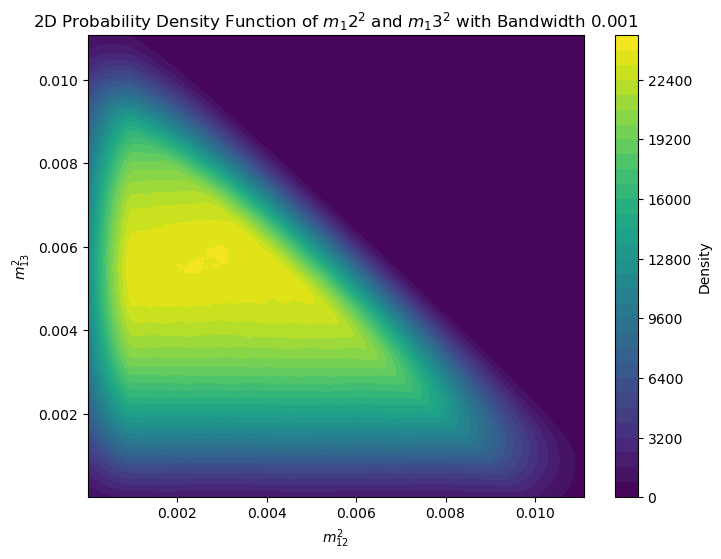

In [100]:
plt.figure(figsize=(8, 6))
plt.contourf(xgrid, ygrid, zgrid1, levels=30, cmap="viridis")
plt.colorbar(label="Density")
plt.xlabel(r"$m_{12}^2$")
plt.ylabel(r"$m_{13}^2$")
plt.title(f"2D Probability Density Function of $m_{12}^2$ and $m_{13}^2$ with Bandwidth {bandwidth1}")
plt.show()

In [116]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Surface(z=zgrid2, x=xgrid, y=ygrid, colorscale='Viridis')],
)

fig.update_layout(
    title=f"3D PDF with Bandwidth {bandwidth1}",
    scene=dict(
        xaxis_title=r"$m_{12}^2$",
        yaxis_title=r"$m_{13}^2$",
        zaxis_title="Density"
    ),
    width=800,
    height=600,
)

fig.show()